# EDA

## Importación librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Cargar los datos

In [2]:
#En el caso subir archivos a google colab
#rom google.colab import files
#uploaded = files.upload()

In [3]:
#df = pd.read_csv('./data/Titanic-Dataset.csv') #Cargar desde local
#df = sns.load_dataset('titanic') #Cargar desde seaborn
df = pd.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv') #Cargar desde URL

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


## Análisis Univariado

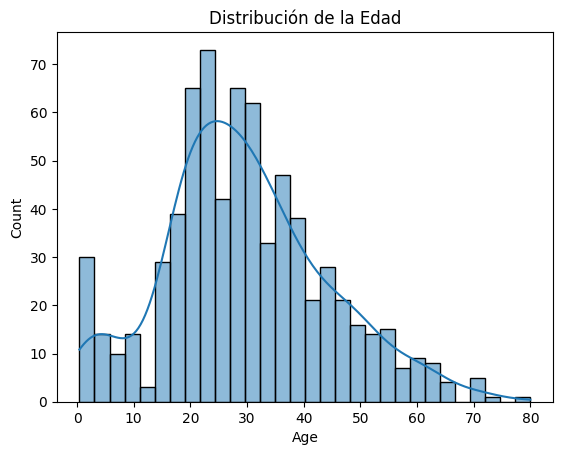

In [ ]:
# Distribución de la edad
sns.histplot(df["Age"].dropna(), bins=30, kde=True)
plt.title('Distribución de la Edad')
plt.show()

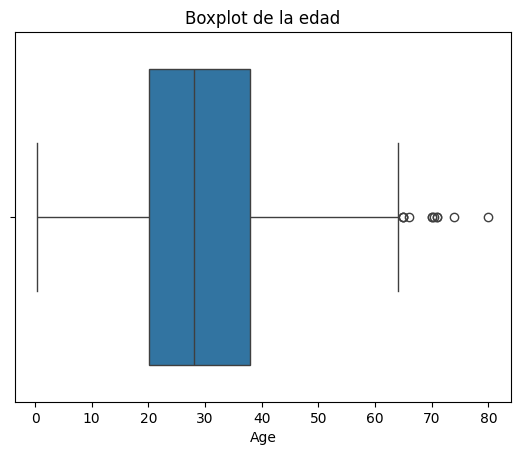

In [ ]:
sns.boxplot(x=df["Age"])
plt.title('Boxplot de la edad')
plt.show()

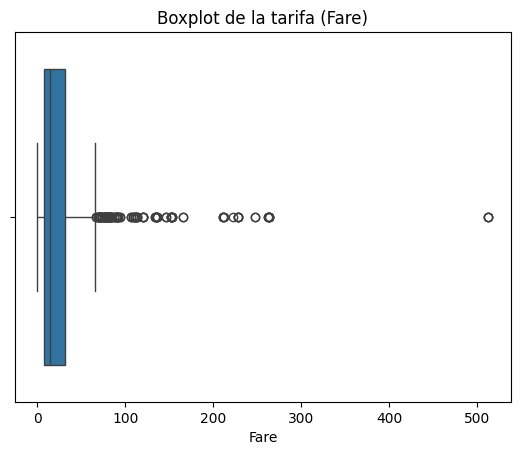

In [ ]:
sns.boxplot(x=df["Fare"])
plt.title('Boxplot de la tarifa (Fare)')
plt.show()

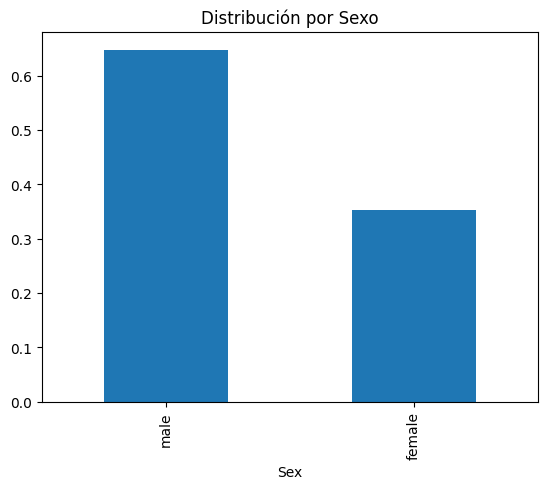

In [ ]:
df["Sex"].value_counts(normalize=True).plot(kind='bar')
plt.title('Distribución por Sexo')
plt.show()

## Análisis Bivariado

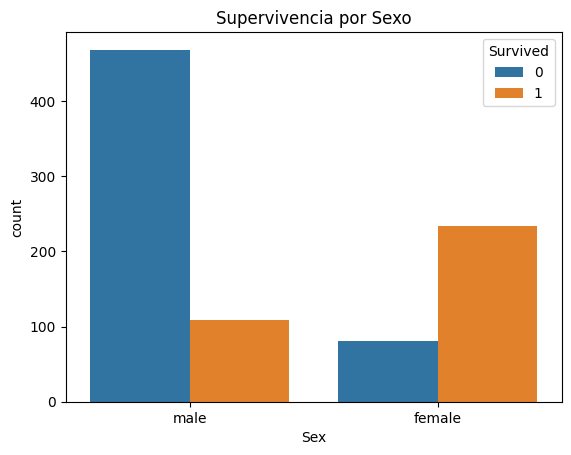

In [ ]:
# Supervivencia según el sexo de pasajero
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title('Supervivencia por Sexo')
plt.show()

In [ ]:

# Filtrar mujeres
mujeres = df[df["Sex"]=="female"]
# Calcular porcentaje y cantidad de sobrevivientes
porcentaje_mujeres = mujeres["Survived"].mean() * 100
cantidad_mujeres = mujeres["Survived"].sum()
total_mujeres = mujeres.shape[0]  #shape da la forma del dataframe y tiene dos valores (filas, columnas) (314, 12) y necesitamos el numero de filas

print(f"Sobrevivieron {cantidad_mujeres} mujeres de un total de {total_mujeres} ({porcentaje_mujeres:.2f}%)")
print("En total muerieron", total_mujeres-cantidad_mujeres)

Sobrevivieron 233 mujeres de un total de 314 (74.20%)
En total muerieron 81


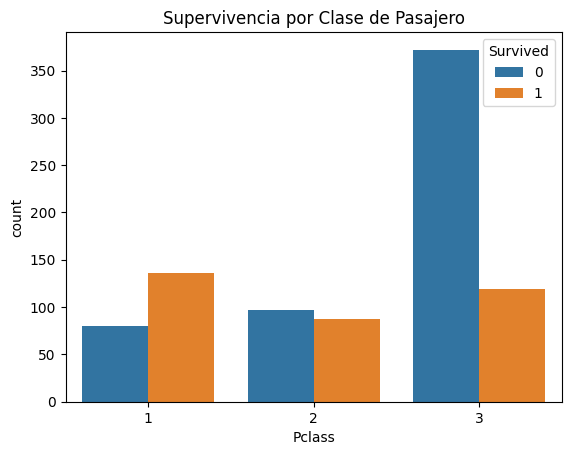

In [ ]:
# Supervivencia según clase
sns.countplot(x='Pclass', hue="Survived", data=df, order=[1,2,3])
plt.title('Supervivencia por Clase de Pasajero')
plt.show()

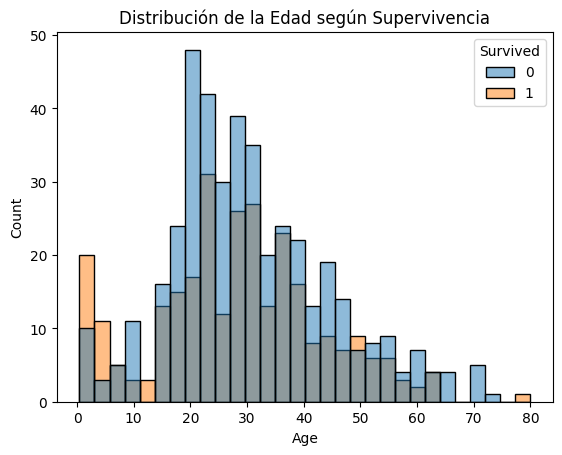

In [ ]:
# Relación de supervivencia con la edad
sns.histplot(data=df, x="Age", hue="Survived", bins=30)
plt.title('Distribución de la Edad según Supervivencia')
plt.show()

## Análisis multivariado

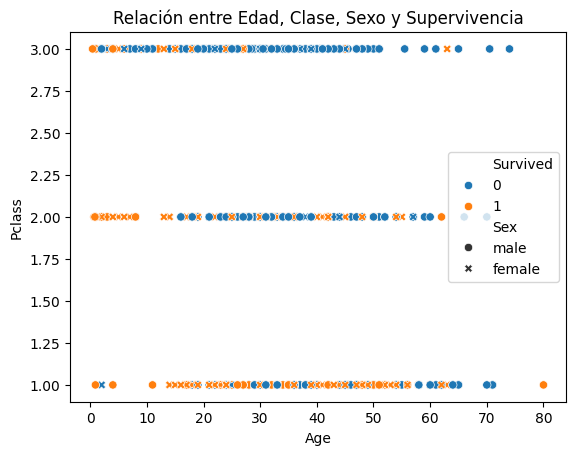

In [ ]:
sns.scatterplot(data=df,
                x="Age", y="Pclass",
                hue="Survived", style="Sex")
plt.title('Relación entre Edad, Clase, Sexo y Supervivencia')
plt.show()

## Correlación

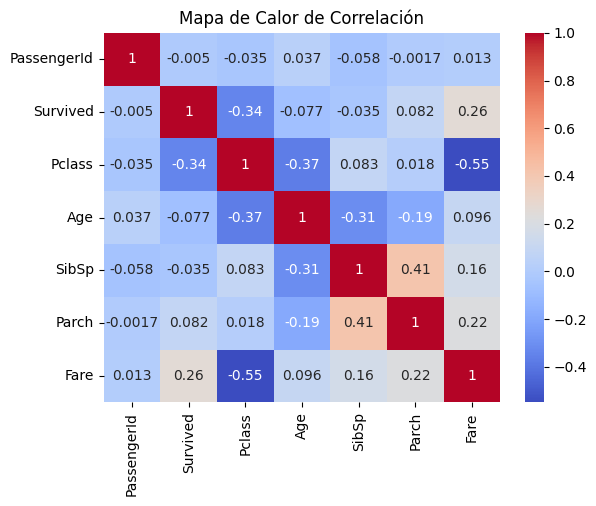

In [ ]:
# Factores númericos del dataset
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

## Tablas cruzadas

In [6]:
pd.crosstab(df["Sex"], df["Survived"], normalize="index")*100
# ¿De todas las mujeres?
# ¿Cuántas sobrevivieron y cuantas murieron?
#¿De todos los hombres? ¿Cuántos sobrevivieron y cuantos murieron?

Survived,0,1
Sex,,
female,25.796178,74.203822
male,81.109185,18.890815


In [7]:
pd.crosstab(df["Sex"], df["Survived"], normalize="columns")*100
#¿Entre las personas que murieron, que porcentaje eran hombres y que porcentaje eran mujeres?
#¿Entre las personas que sobrevivieron, que porcentaje eran hombres y que porcentaje eran mujeres?

Survived,0,1
Sex,,
female,14.754098,68.128655
male,85.245902,31.871345


In [8]:
pd.crosstab([df["Sex"], df['Pclass']],df["Survived"], normalize="index")*100

Survived               0          1
Sex    Pclass                      
female 1        3.191489  96.808511
       2        7.894737  92.105263
       3       50.000000  50.000000
male   1       63.114754  36.885246
       2       84.259259  15.740741
       3       86.455331  13.544669

In [9]:
pd.crosstab([df["Sex"], df['Pclass'],df['Age']],df["Survived"], normalize="index")*100

Survived                0      1
Sex    Pclass Age               
female 1      2.0   100.0    0.0
              14.0    0.0  100.0
              15.0    0.0  100.0
              16.0    0.0  100.0
              17.0    0.0  100.0
...                   ...    ...
male   3      59.0  100.0    0.0
              61.0  100.0    0.0
              65.0  100.0    0.0
              70.5  100.0    0.0
              74.0  100.0    0.0

[283 rows x 2 columns]

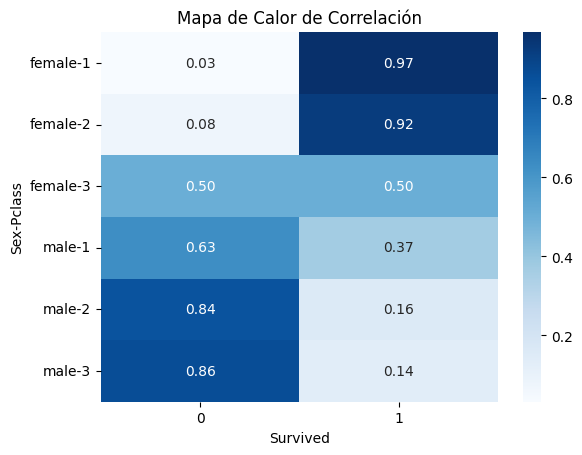

In [22]:
cross_tab = pd.crosstab([df["Sex"], df['Pclass']],df["Survived"], normalize="index")
sns.heatmap(cross_tab, annot=True, fmt="0.2f", cmap='Blues')
plt.title('Mapa de Calor de Correlación')
plt.show()


In [23]:
cross_tab

Survived              0         1
Sex    Pclass                    
female 1       0.031915  0.968085
       2       0.078947  0.921053
       3       0.500000  0.500000
male   1       0.631148  0.368852
       2       0.842593  0.157407
       3       0.864553  0.135447

In [17]:
cross_tab = cross_tab.reset_index().melt(
    id_vars=["Sex", "Pclass"],
    value_vars=[0, 1],
    var_name="Survived",
    value_name="Percentage"
)


In [18]:
cross_tab

,Sex,Pclass,Survived,Percentage
0,female,1,0,0.031915
1,female,2,0,0.078947
2,female,3,0,0.500000
3,male,1,0,0.631148
4,male,2,0,0.842593
5,male,3,0,0.864553
6,female,1,1,0.968085
7,female,2,1,0.921053
8,female,3,1,0.500000
9,male,1,1,0.368852


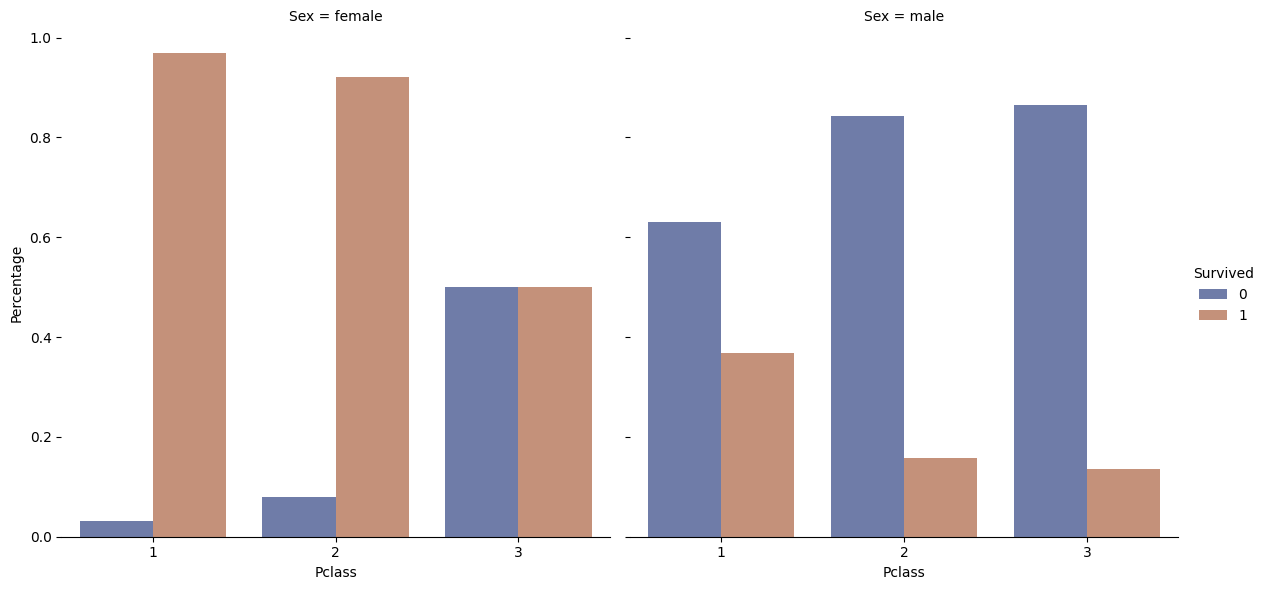

In [21]:
g = sns.catplot(
    data=cross_tab, kind="bar",
    x="Pclass", y="Percentage", hue="Survived", col="Sex",
    palette="dark", alpha=.6, height=6
)
g.despine(left=True)

In [ ]:
bins = [0, 12, 18, 30, 50, 80]
labels = ["Niño", "Adolescente", "Joven", "Adulto", "Anciano"]
df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels)
df

In [11]:
pd.crosstab([df["Sex"], df['Pclass'],df['Age_Group']],df["Survived"], normalize="index")*100

Survived                            0           1
Sex    Pclass Age_Group                          
female 1      Niño         100.000000    0.000000
              Adolescente    0.000000  100.000000
              Joven          4.166667   95.833333
              Adulto         2.702703   97.297297
              Anciano        0.000000  100.000000
       2      Niño           0.000000  100.000000
              Adolescente    0.000000  100.000000
              Joven         10.000000   90.000000
              Adulto         7.407407   92.592593
              Anciano       33.333333   66.666667
       3      Niño          52.173913   47.826087
              Adolescente   45.000000   55.000000
              Joven         50.000000   50.000000
              Adulto        72.727273   27.272727
              Anciano        0.000000  100.000000
male   1      Niño           0.000000  100.000000
              Adolescente   50.000000   50.000000
              Joven         57.142857   42.857143
              Adulto        55.102041   44.897959
              Anciano       80.769231   19.230769
       2      Niño           0.000000  100.000000
              Adolescente  100.000000    0.000000
              Joven         97.297297    2.702703
              Adulto        88.571429   11.428571
              Anciano       91.666667    8.333333
       3      Niño          64.000000   36.000000
              Adolescente   92.307692    7.692308
              Joven         85.245902   14.754098
              Adulto        87.323944   12.676056
              Anciano      100.000000    0.000000

In [24]:
tabla = pd.crosstab([df["Sex"], df['Pclass'],df['Age_Group']],df["Survived"], normalize="index")*100

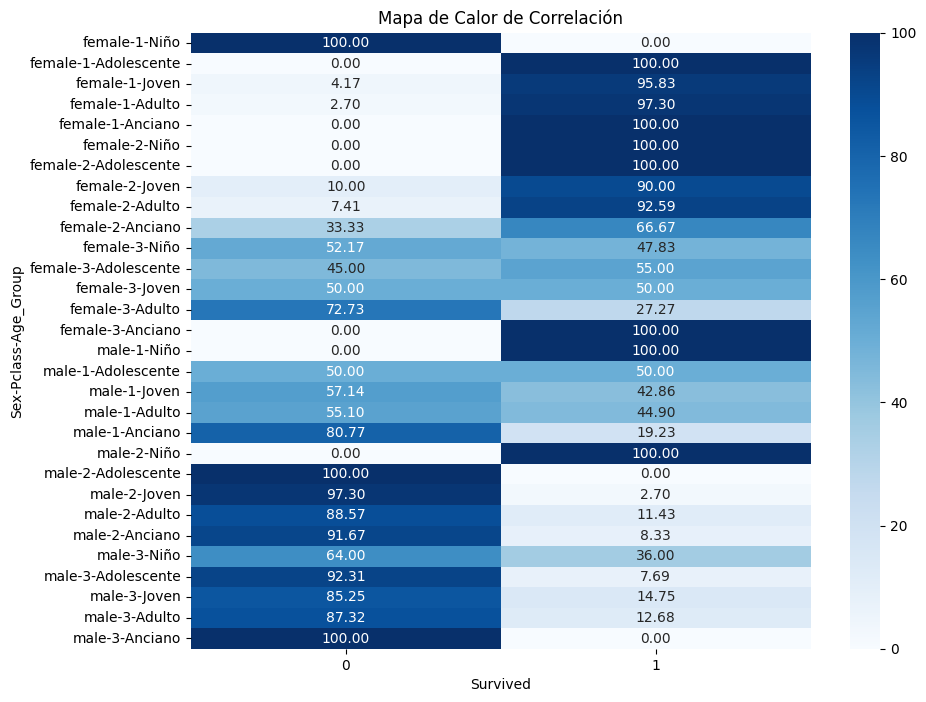

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(tabla, annot=True, fmt="0.2f", cmap='Blues')
plt.title('Mapa de Calor de Correlación')
plt.show()

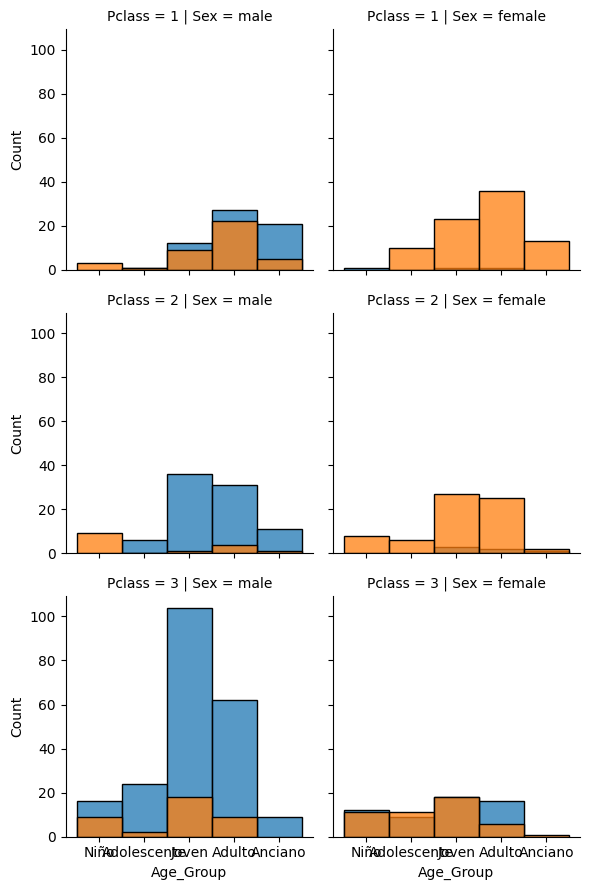

In [29]:
g = sns.FacetGrid(df, col="Sex", row="Pclass", hue="Survived")
g.map_dataframe(sns.histplot, x="Age_Group", bins=30)